In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

<IPython.core.display.Javascript object>

In [2]:
url_to_covid = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [3]:
df_orig = pd.read_csv(url_to_covid)

In [4]:
df_orig.shape

(46484, 41)

In [5]:
df_orig.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [6]:
df_orig.date

0        2019-12-31
1        2020-01-01
2        2020-01-02
3        2020-01-03
4        2020-01-04
            ...    
46479    2020-09-23
46480    2020-09-24
46481    2020-09-25
46482    2020-09-26
46483    2020-09-27
Name: date, Length: 46484, dtype: object

In [7]:
df_orig.location.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

In [8]:
df = df_orig[df_orig.location == 'United States']

In [10]:
df.shape

(272, 41)

In [11]:
df = df.sort_values('date')

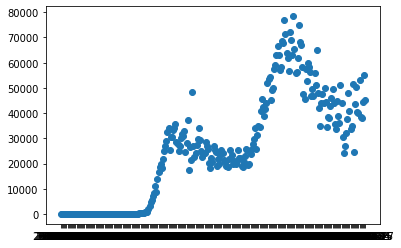

In [12]:
plt.scatter(df.date, df.new_cases)

In [13]:
df = df_orig.copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46484 entries, 0 to 46483
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         46212 non-null  object 
 1   continent                        45940 non-null  object 
 2   location                         46484 non-null  object 
 3   date                             46484 non-null  object 
 4   total_cases                      45870 non-null  float64
 5   new_cases                        45662 non-null  float64
 6   new_cases_smoothed               44880 non-null  float64
 7   total_deaths                     45870 non-null  float64
 8   new_deaths                       45662 non-null  float64
 9   new_deaths_smoothed              44880 non-null  float64
 10  total_cases_per_million          45598 non-null  float64
 11  new_cases_per_million            45598 non-null  float64
 12  new_cases_smoothed

In [15]:
df.shape

(46484, 41)

In [16]:

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
new_tests,new_tests,64.611479
new_tests_per_thousand,new_tests_per_thousand,64.611479
total_tests_per_thousand,total_tests_per_thousand,63.750968
total_tests,total_tests,63.750968
tests_per_case,tests_per_case,63.365889
positive_rate,positive_rate,62.445142
new_tests_smoothed,new_tests_smoothed,60.113157
new_tests_smoothed_per_thousand,new_tests_smoothed_per_thousand,60.113157
tests_units,tests_units,58.321143
handwashing_facilities,handwashing_facilities,58.269512


In [17]:
cols_too_many_missing = missing_value_df[missing_value_df.percent_missing > 50].index.tolist()
len(cols_too_many_missing)
cols_too_many_missing

10

['new_tests',
 'new_tests_per_thousand',
 'total_tests_per_thousand',
 'total_tests',
 'tests_per_case',
 'positive_rate',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_units',
 'handwashing_facilities']

In [21]:
df_orig.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [57]:
target_var = 'new_cases'
df = df_orig.dropna(subset=[target_var])

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
df.shape

(45662, 41)

In [59]:
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_ra

In [60]:
df.tests_units.unique()

array([nan, 'people tested', 'tests performed', 'units unclear',
       'samples tested', 'people tested (incl. non-PCR)'], dtype=object)

In [61]:
df_cat = df.select_dtypes('object')

In [62]:
df_fp = df.select_dtypes('float64')

In [63]:
df_fp.shape

(45662, 36)

In [64]:
df_cat = pd.get_dummies(df_cat, dummy_na=True)

In [65]:
df_cat.shape

(45662, 709)

In [66]:
df_cat.head()

,iso_code_ABW,iso_code_AFG,iso_code_AGO,iso_code_AIA,iso_code_ALB,iso_code_AND,iso_code_ARE,iso_code_ARG,iso_code_ARM,iso_code_ATG,...,date_2020-09-25,date_2020-09-26,date_2020-09-27,date_nan,tests_units_people tested,tests_units_people tested (incl. non-PCR),tests_units_samples tested,tests_units_tests performed,tests_units_units unclear,tests_units_nan
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
y = df_fp[target_var]

In [68]:
df_fp = df_fp[[x for x in df_fp.columns if x!=target_var]]

In [69]:
df_fp.shape

(45662, 35)

In [70]:
X = pd.concat([df_fp, df_cat], axis=1)

In [71]:
import xgboost as xgb

In [76]:
reg = xgb.XGBRegressor(n_estimators = 10)

In [77]:
reg.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
np.unique(reg.predict(X))

array([-3.79711841e+03, -8.10921082e+02, -6.74883179e+02, -5.36421021e+02,
       -1.42539047e+02, -1.20496323e+02, -8.47147522e+01, -6.26720276e+01,
       -2.55678444e+01, -1.57406387e+01, -1.40297194e+01, -5.37403774e+00,
       -3.52512217e+00,  1.30965614e+00,  8.01300240e+00,  9.96533966e+00,
        1.53353443e+01,  1.66686840e+01,  1.68445892e+01,  1.74946613e+01,
        2.33523769e+01,  2.39910297e+01,  2.57412395e+01,  3.20080605e+01,
        3.28340302e+01,  3.73780670e+01,  3.95373840e+01,  3.96253967e+01,
        4.25622635e+01,  4.60337524e+01,  4.68597183e+01,  4.77839622e+01,
        5.02080765e+01,  5.37473602e+01,  5.48767548e+01,  5.79016342e+01,
        5.88637619e+01,  6.16681175e+01,  6.46049881e+01,  6.89024429e+01,
        7.19273224e+01,  7.23161316e+01,  7.57900848e+01,  7.99443588e+01,
        8.10315247e+01,  8.14902267e+01,  8.17324524e+01,  8.58478241e+01,
        8.96872101e+01,  9.39700470e+01,  9.43588562e+01,  1.03532951e+02,
        1.04963348e+02,  

In [82]:
reg.score?

In [49]:
y.shape

(46484,)

In [50]:
X.head()

,total_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,...,date_2020-09-25,date_2020-09-26,date_2020-09-27,date_nan,tests_units_people tested,tests_units_people tested (incl. non-PCR),tests_units_samples tested,tests_units_tests performed,tests_units_units unclear,tests_units_nan
0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
X.describe()

,total_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,...,date_2020-09-25,date_2020-09-26,date_2020-09-27,date_nan,tests_units_people tested,tests_units_people tested (incl. non-PCR),tests_units_samples tested,tests_units_tests performed,tests_units_units unclear,tests_units_nan
count,4.587000e+04,44880.000000,45870.000000,45662.000000,44880.000000,45598.000000,45598.000000,44815.000000,45598.000000,45598.000000,...,46484.000000,46484.000000,46484.000000,46484.0,46484.000000,46484.000000,46484.000000,46484.000000,46484.000000,46484.000000
mean,1.013754e+05,1425.859269,4081.959560,43.587534,43.586032,1902.517908,24.645139,24.226913,57.691949,0.565379,...,0.004539,0.004539,0.004518,0.0,0.100163,0.004238,0.086137,0.216612,0.009638,0.583211
std,1.049585e+06,12874.195377,37978.921338,367.241296,357.056573,4029.529199,74.465131,57.525701,143.499415,3.009690,...,0.067221,0.067221,0.067062,0.0,0.300221,0.064963,0.280570,0.411941,0.097699,0.493033
min,0.000000e+00,-552.000000,0.000000,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,0.000000,-67.901000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000e+01,0.571000,1.000000,0.000000,0.000000,30.119000,0.000000,0.139000,0.015000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.025000e+03,14.857000,20.000000,0.000000,0.143000,281.997000,1.570000,2.960000,4.952000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.092525e+04,169.571000,237.000000,3.000000,3.000000,1943.057000,17.696750,19.366000,35.320000,0.203000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.291671e+07,296556.571000,995147.000000,10461.000000,7460.286000,43334.745000,4944.376000,882.924000,1237.551000,215.382000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
X.head(20)

,total_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,...,date_2020-09-25,date_2020-09-26,date_2020-09-27,date_nan,tests_units_people tested,tests_units_people tested (incl. non-PCR),tests_units_samples tested,tests_units_tests performed,tests_units_units unclear,tests_units_nan
0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
X.total_cases.tail()

46479    696.0
46480    696.0
46481    696.0
46482    696.0
46483    696.0
Name: total_cases, dtype: float64

In [54]:
y.isnull().sum()

822